In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')
planets = sns.load_dataset('planets')

In [4]:
p = pd.read_csv('perros.csv')
p.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [48]:
def toYears(ageString):
    if "year" in ageString: 
        return int(ageString[:2])
    if "month" in ageString:
        age = int(ageString[:2])
        return age/12
    if "week" in ageString:
        age = int(ageString[:2])
        return age/52

p["Age"] = p['Age upon Intake'].transform(toYears)
p.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Quarter,year,month,quarter,Age
0,A786884,*Brock,2019-01-03 16:19:00,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,1,2019,1,1,2.000000
1,A706918,Belle,2015-07-05 12:59:00,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,3,2015,7,3,8.000000
2,A724273,Runster,2016-04-14 18:43:00,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,2,2016,4,2,0.916667
3,A665644,NaN,2013-10-21 07:59:00,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,4,2013,10,4,0.076923
4,A682524,Rio,2014-06-29 10:38:00,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2,2014,6,2,4.000000


In [31]:
# DateTime to quarter/month/year
p.DateTime = pd.to_datetime(p.DateTime)
p["quarter"] = p.DateTime.dt.quarter
p ["year"] = p.DateTime.dt.year
p ["month"] = p.DateTime.dt.month
p.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Quarter,year,month,quarter
0,A786884,*Brock,2019-01-03 16:19:00,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,1,2019,1,1
1,A706918,Belle,2015-07-05 12:59:00,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,3,2015,7,3
2,A724273,Runster,2016-04-14 18:43:00,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,2,2016,4,2
3,A665644,NaN,2013-10-21 07:59:00,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,4,2013,10,4
4,A682524,Rio,2014-06-29 10:38:00,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2,2014,6,2


In [38]:
p['Intake Type'].unique()

array(['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request', 'Abandoned'], dtype=object)

<AxesSubplot:xlabel='year', ylabel='quarter'>

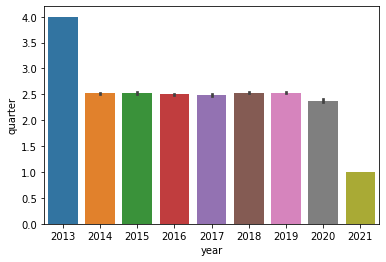

In [36]:
# Barplot
sns.barplot(x='year',y='quarter',data=p)

<AxesSubplot:xlabel='year', ylabel='Count'>

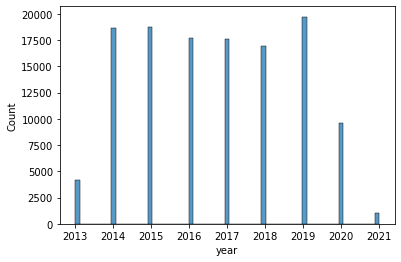

In [37]:
#Histplot
sns.histplot(p['year'])

<AxesSubplot:xlabel='month', ylabel='Count'>

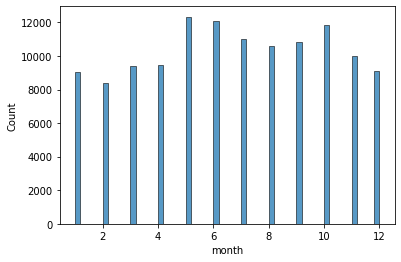

In [39]:
sns.histplot(p['month'])

In [ ]:
#Boxplot

<AxesSubplot:xlabel='Intake Condition', ylabel='Age'>

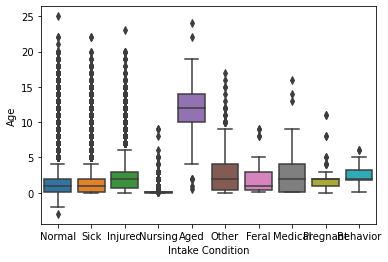

In [50]:
sns.boxplot(x='Intake Condition',y='Age',data=p)

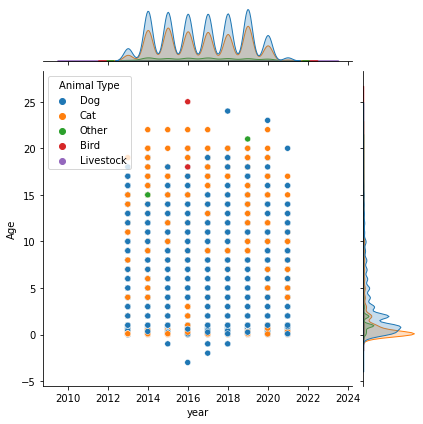

In [56]:
sns.jointplot(x='year',y='Age',data=p,hue='Animal Type')

In [58]:
i = pd.read_csv('insurance.csv')
i

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [96]:
i['smoker'] = i['smoker'].transform(lambda x: x=='yes')
i.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,False,southwest,16884.92400
1,18,male,33.770,1,False,southeast,1725.55230
2,28,male,33.000,3,False,southeast,4449.46200
3,33,male,22.705,0,False,northwest,21984.47061
4,32,male,28.880,0,False,northwest,3866.85520


In [101]:
i.groupby('region').sum()['smoker']

region
northeast    0
northwest    0
southeast    0
southwest    0
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='Count'>

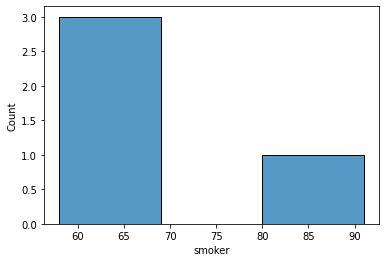

In [84]:
sns.histplot(piv.sum()['smoker'])

<AxesSubplot:xlabel='age', ylabel='charges'>

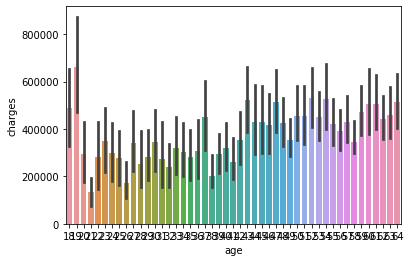

In [94]:
sns.barplot(x='age',y='charges',data=i, estimator=sum)

<AxesSubplot:xlabel='region', ylabel='charges'>

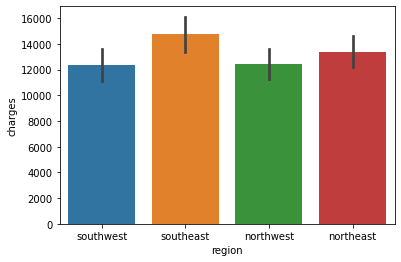

In [59]:
sns.barplot(x='region',y='charges',data=i)

<AxesSubplot:xlabel='region', ylabel='bmi'>

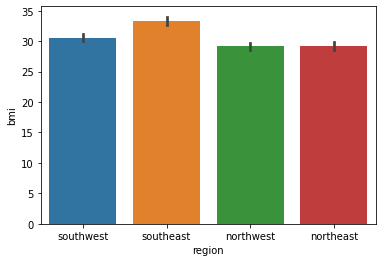

In [60]:
sns.barplot(x='region',y='bmi',data=i)

In [9]:
# Titanic
titanic = sns.load_dataset('titanic')

In [6]:
# scatterplot

In [7]:
# stripplot

In [ ]:
# jointplot

In [ ]:
# histplot

In [8]:
# Insurance

In [10]:
i = pd.read_csv('insurance.csv')
i

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:xlabel='bmi', ylabel='age'>

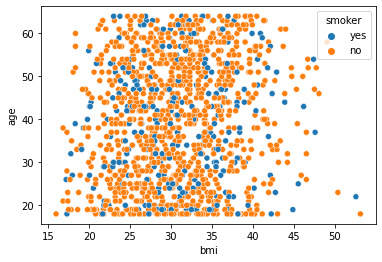

In [14]:
sns.scatterplot(x='bmi',y='age',data = i, hue='smoker')

<AxesSubplot:xlabel='age', ylabel='charges'>

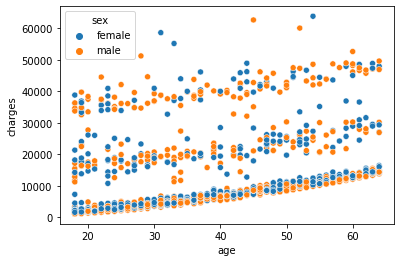

In [17]:
sns.scatterplot(x='age',y='charges',data = i, hue='sex')

In [ ]:
sns.stripplot(x='age',y='charges',data = i, hue='sex')

<AxesSubplot:xlabel='region', ylabel='charges'>

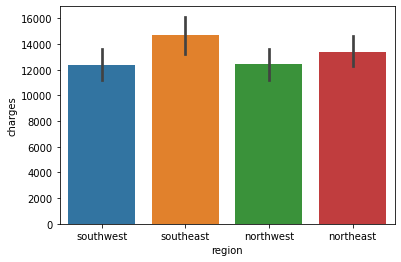

In [19]:
sns.barplot(x='region', y='charges', data=i)

<AxesSubplot:xlabel='region', ylabel='bmi'>

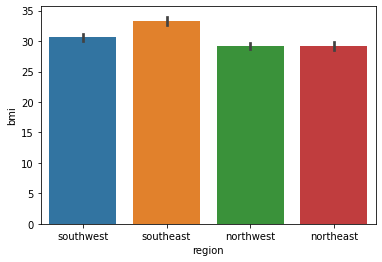

In [20]:
sns.barplot(x='region', y='bmi', data=i)

<AxesSubplot:>

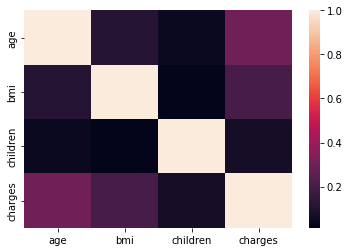

In [22]:
sns.heatmap(i.corr())